In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0')

[2017-02-24 14:26:41,050] Making new env: FrozenLake-v0


In [20]:
def one_hot(x):
    return np.identity(16)[x:x + 1]

In [21]:
# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [22]:
# Theses lines establish the feed-forward part of the network used to choose actions
X = tf.placeholder(shape=[1,input_size], dtype=tf.float32) # state input
W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01)) # weight

Qpred = tf.matmul(X,W) # out Q prediction
Y = tf.placeholder(shape=[1,output_size], dtype=tf.float32) # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [38]:
# Set Q-learning related parameters
dis = 0.99
num_episodes = 2000

In [39]:
# Create lists to contrain total rewards and steps per episode
rList = []

In [40]:
# Initializing the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Percent of successful episodes:0.562%


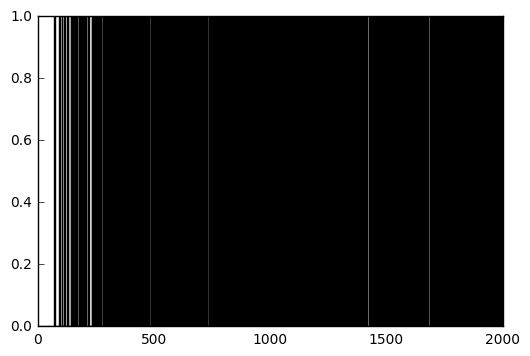

In [41]:
# Q-network training
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    e = 1. / ((i / 50) + 10)
    rAll = 0
    done = False
    local_loss = []
    
    # The Q-Network training
    while not done:
        # Choose an action by greedily (with e chance of random action) from the Q-network
        Qs = sess.run(Qpred, feed_dict={X:one_hot(s)})
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Qs)
            
        # Get new state and reward from environment
        s1, reward, done, _ = env.step(action)
        if done:
            # Update Q, and no Qs+1, sice it's a terminal state
            Qs[0, action] = reward
        else:
            # Obtain the Q_s1 values by feeding the new state through our network 
            Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
            # update Q
            Qs[0, action] = reward + dis * np.max(Qs1)
            
        sess.run(train, feed_dict={X: one_hot(s), Y:Qs})
        
        rAll = rAll + reward
        s = s1
    rList.append(rAll)
print("Percent of successful episodes:" + str(sum(rList)/num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
            
            